<a href="https://colab.research.google.com/github/trujoan/Inteligencia-Artificial/blob/main/reconocimiento_facial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition


<IPython.core.display.Javascript object>

Saved to photo.jpg


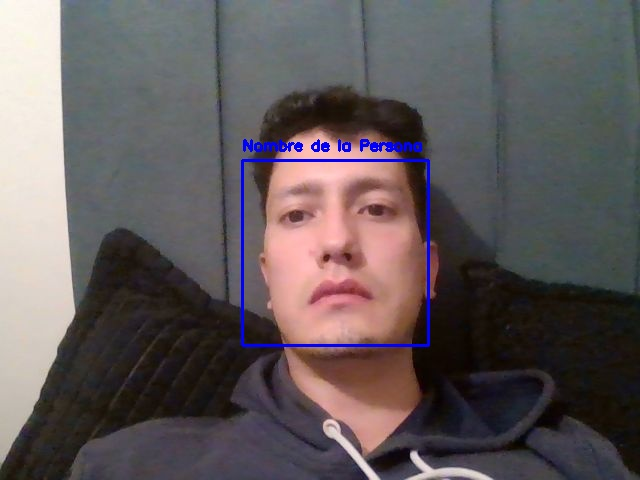

In [ ]:
# Import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import face_recognition

# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes

# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Function to recognize faces
def recognize_face(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(rgb_image)
    face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

    known_image = face_recognition.load_image_file("/content/Angel.jpeg")  # Imagen de referencia
    known_encoding = face_recognition.face_encodings(known_image)[0]

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces([known_encoding], face_encoding)
        name = "Desconocido"

        if True in matches:
            name = "Nombre de la Persona"  # Cambia según sea necesario

        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

# Function to take a photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray)
    img_with_names = recognize_face(img)

    cv2.imwrite(filename, img_with_names)

    return filename

# Try taking a photo
try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))
    display(Image(filename))
except Exception as err:
    print(str(err))


In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7bb79f346bdb47b78319444518da703235d8422096895c960066b5728fc68ddf
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


24-10-21 00:45:44 - Directory /root/.deepface has been created
24-10-21 00:45:44 - Directory /root/.deepface/weights has been created


<IPython.core.display.Javascript object>

24-10-21 00:45:55 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/3 [00:00<?, ?it/s]

24-10-21 00:45:56 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  2%|▏         | 11.0M/580M [00:00<00:06, 92.3MB/s]
  4%|▍         | 25.2M/580M [00:00<00:04, 117MB/s] 
  7%|▋         | 37.7M/580M [00:00<00:04, 121MB/s]
  9%|▉         | 51.9M/580M [00:00<00:04, 129MB/s]
 11%|█         | 65.0M/580M [00:00<00:04, 113MB/s]
 14%|█▎        | 78.6M/580M [00:00<00:04, 120MB/s]
 16%|█▌        | 92.3M/580M [00:00<00:03, 124MB/s]
 18%|█▊        | 105M/580M [00:00<00:04, 112MB/s] 
 21%|██        | 121M/580M [00:01<00:03, 124MB/s]
 23%|██▎       | 134M/580M [00:01<00:03, 125MB/s]
 25%|██▌       | 147M/580M [00:01<00:03, 111MB/s]
 28%|██▊       | 160M/580M [00:01<00:03, 116MB/s]
 31%|███       | 177M/580M [00:01<00:03, 130MB/s]
 33%|███▎      | 191M/580M [00:01<00:03, 114MB/s]
 35%|███▌      | 204M/580M [00:01<00:03, 119MB/s]
 38%|███▊      | 221M/580M [00:01<00:03,

24-10-21 00:46:04 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-10-21 00:46:04 - Searching temp_image.jpg in 3 length datastore
24-10-21 00:46:05 - find function duration 10.403069257736206 seconds
Error en el reconocimiento:  OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'

Saved to photo.jpg


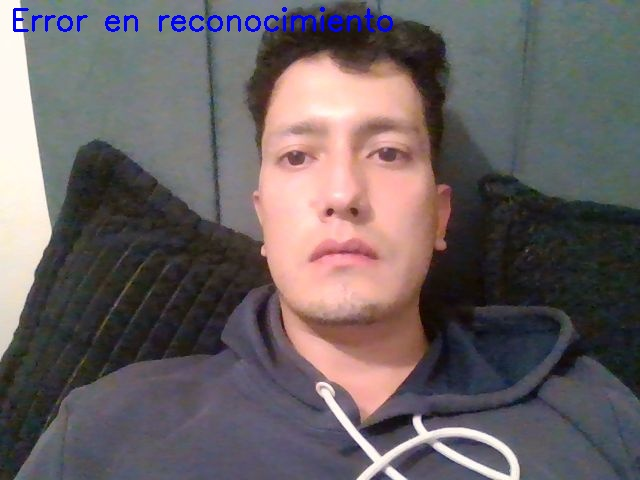

In [ ]:
# Import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL
import io
import time
from deepface import DeepFace

# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Function to recognize faces using DeepFace
def recognize_face(image):
    temp_filename = 'temp_image.jpg'
    cv2.imwrite(temp_filename, image)

    try:
        # Busca la identidad en la base de datos
        result = DeepFace.find(temp_filename, db_path='/content')  # Cambia esto a la ruta de tu base de datos
        if len(result) > 0:
            name = result[0]['identity']  # Obtener el nombre reconocido
            cv2.putText(image, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
            cv2.putText(image, "Desconocido", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    except Exception as e:
        print("Error en el reconocimiento: ", str(e))
        cv2.putText(image, "Error en reconocimiento", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return image

# Function to take a photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)

    img_with_names = recognize_face(img)
    cv2.imwrite(filename, img_with_names)

    return filename

# Try taking a photo
try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))
    display(Image(filename))
except Exception as err:
    print(str(err))


ingrese su nombre para la deteccion Angel


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


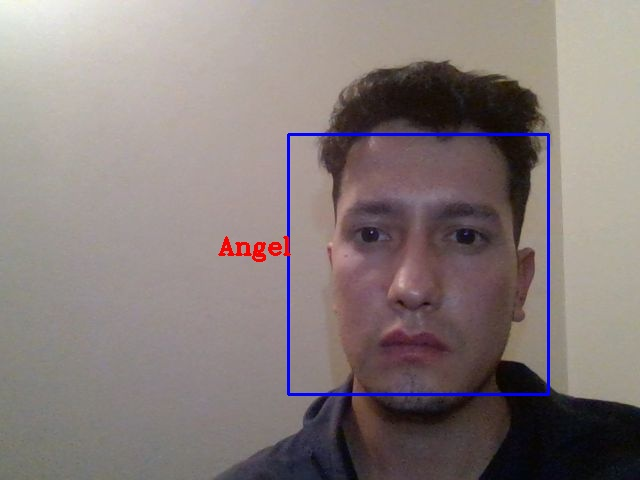

In [ ]:
# Librerías o dependencias
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import base64
import cv2
import numpy as np
import PIL
import io
import html
import time


nombre = input("ingrese su nombre para la deteccion ")

# Convertir el objeto en Javascript a una imagen de OpenCV
def js_to_image (js_reply):
  """
  Params:
        js_reply: JavaScript object containing image from webcam
  Returns:
        Img: OpenCV BGR image
  """
  # Decodificar la imagen según formato base64

  image_bytes = b64decode (js_reply.split(',')[1])

  # ordenar los bytes en un formato Numpy
  jpg_as_np= np.frombuffer(image_bytes,dtype=np.uint8)

  # decodificar el numpy en una imagen RGB de OpenCV
  return cv2.imdecode(jpg_as_np, flags=1)

def bbox_to_bytes(bbox_array):
  """
  Params:
        bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream
  Returns:
       bytes: Base64 image byte string
  """

  bbox_PIL=PIL.Image.fromarray(bbox_array, 'RGBA')

  iobuf=io.BytesIO()

  bbox_PIL.save(iobuf, format='png')

  bbox_bytes='data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

face_cascade=cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
 js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
 display(js)

  # get photo data
 data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
 img = js_to_image(data)
  # grayscale img
 gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
 print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
 faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
 for (x,y,w,h) in faces:
     img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
 cv2.putText(img, nombre, (x + (w // 2) - 200, y + (h // 2) - 10),cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 0, 255), 2)
 cv2.imwrite(filename, img)

 return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


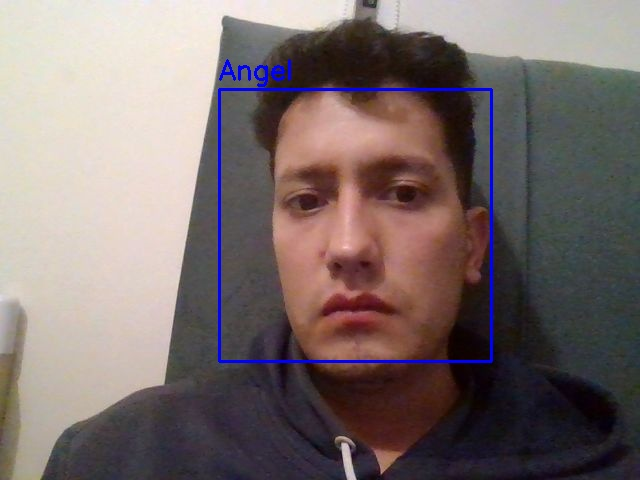

In [ ]:
# Librerías o dependencias
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import base64
import cv2
import numpy as np
import PIL
import io
import html
import time

# Convertir el objeto en Javascript a una imagen de OpenCV
def js_to_image(js_reply):
    """
    Params:
        js_reply: JavaScript object containing image from webcam
    Returns:
        Img: OpenCV BGR image
    """
    # Decodificar la imagen según formato base64
    image_bytes = b64decode(js_reply.split(',')[1])

    # Ordenar los bytes en un formato Numpy
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)

    # Decodificar el numpy en una imagen RGB de OpenCV
    return cv2.imdecode(jpg_as_np, flags=1)

def bbox_to_bytes(bbox_array):
    """
    Params:
        bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream
    Returns:
        bytes: Base64 image byte string
    """
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')

    iobuf = io.BytesIO()

    bbox_PIL.save(iobuf, format='png')

    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

# Cargar el clasificador Haar para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8, name='Angel'):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Obtener la imagen en formato OpenCV
    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Obtener las coordenadas de los rostros detectados usando Haar Cascade
    faces = face_cascade.detectMultiScale(gray)

    # Dibujar el recuadro sobre el rostro y añadir el nombre
    for (x, y, w, h) in faces:
        # Dibujar el rectángulo
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        # Añadir el nombre sobre el rectángulo
        cv2.putText(img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Guardar la imagen
    cv2.imwrite(filename, img)

    return filename

try:
    # Tomar la foto y guardar la imagen con el nombre "Miguel Martinez" sobre el rostro
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))

    # Mostrar la imagen tomada
    display(Image(filename))
except Exception as err:
    # Manejar errores si el usuario no tiene una cámara o no otorga permisos
    print(str(err))


<IPython.core.display.Javascript object>

Saved to photo.jpg


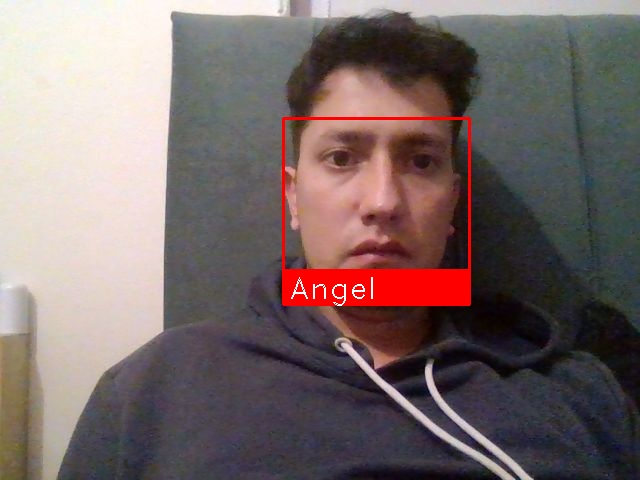

In [ ]:
!pip install face_recognition

#se importan las librerias
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import face_recognition
import html
import time


def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """

  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # lo ponemos en formato png
  bbox_PIL.save(iobuf, format='png')
  # subimos la foto con la que se va a relacionar
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
jp_image = face_recognition.load_image_file("/content/Angel.jpeg")
jp_face_encoding = face_recognition.face_encodings(jp_image)[0]


known_face_encodings = [
    jp_face_encoding,
]
known_face_names = [
    "Angel",
]
# agregamos este codgio para que habilite la funcion de tomar la foto
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  face_locations = face_recognition.face_locations(img)
  face_encodings = face_recognition.face_encodings(img, face_locations)
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
    cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(img, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(img, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

  cv2.imwrite(filename, img)

  return filename

try:

  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))